In [1]:
cd datasets/NLS

C:\Users\Daniele\Desktop\Materiale Tesi\Tesi magistrale\datasets\NLS


# Import

In [2]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler

# Aggiungo gli headers al CSV
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

df = pd.read_csv('KDDTrain+.csv', encoding='cp1252', names = col_names)
df_test = pd.read_csv('KDDTest+.csv', encoding='cp1252', names = col_names)

labeldf=df['label']
labeldf_test=df_test['label']

C:\Users\Daniele\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Daniele\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Daniele\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Daniele\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Functions

In [3]:
#Dataset Preparation ----------------------------------------------------------------------------------------------------------

def prepareMulticlass():
    # change the label column
    newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
    newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
    return newlabeldf, newlabeldf_test

def prepareBinary():
    # change the label column
    newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
    newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
    return newlabeldf, newlabeldf_test
  
colNames=list()
colNames_test=list()

def getFullDf():
    global colNames
    colNames=list(df)
    return df

def getFullDfTest():
    global colNames_test
    colNames_test=list(df_test)
    return df_test

def getReducedDf():
    global colNames
    df_reduced=df.drop('protocol_type', axis=1, inplace=False)
    df_reduced=df_reduced.drop('service', axis=1, inplace=False)
    df_reduced=df_reduced.drop('flag', axis=1, inplace=False)
    colNames=list(df_reduced)
    return df_reduced

def getReducedDfTest():
    global colNames_test
    df_reduced=df_test.drop('protocol_type', axis=1, inplace=False)
    df_reduced=df_reduced.drop('service', axis=1, inplace=False)
    df_reduced=df_reduced.drop('flag', axis=1, inplace=False)
    colNames_test=list(df_reduced)
    return df_reduced

def oneHotEcoding(df, column_name):
    df_drop = df.drop(column_name, axis=1, inplace=False)
    one_hot = pd.get_dummies(df[column_name])
    if(column_name == 'service'):
        column_list=list()
        for string in one_hot.columns.tolist():
            column_list.append(column_name+'_'+str(string))
        one_hot.columns=column_list
    df = pd.concat([df_drop, one_hot], axis=1)
    
    return df

def getXandY(df):
    X = df.drop('label',axis=1, inplace=False)
    Y = df.label
    return X, Y

def overSampledDF(X, Y): 
    sm = SMOTE(random_state=42)
    X_resampled, Y_resampled = sm.fit_resample(X, Y)
    df = pd.concat([X_resampled, Y_resampled], axis=1)
    return df

def createMulticlassDF(df):
    to_drop_DoS = [0,1]
    to_drop_Probe = [0,2]
    to_drop_R2L = [0,3]
    to_drop_U2R = [0,4]

    DoS_df=df[df['label'].isin(to_drop_DoS)];
    Probe_df=df[df['label'].isin(to_drop_Probe)];
    R2L_df=df[df['label'].isin(to_drop_R2L)];
    U2R_df=df[df['label'].isin(to_drop_U2R)];
    return DoS_df, Probe_df, R2L_df, U2R_df 

def standardScaler(df):
    scaler = preprocessing.StandardScaler().fit(df)
    return scaler.transform(df) 

def minMaxScaler(df):
    scaler = preprocessing.MinMaxScaler().fit(df)
    return scaler.transform(df)

def recursiveFeatureExtraction(model, X, Y, n):
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X, Y)
    X=rfe.transform(X)
    true=rfe.support_
    rfecolindex=[i for i, x in enumerate(true) if x]
    rfecolname=list(colNames[i] for i in rfecolindex)
    return X, rfecolindex

def adaptTestset(train, test):
    train_service_list=[]
    test_service_list = []
    
    for string in train.columns.tolist():
        if('service' in string):
            train_service_list.append(string)
    
    for string in test.columns.tolist():
        if('service' in string):
            test_service_list.append(string)

    difference=list(set(train_service_list) - set(test_service_list))

    for col in difference:
        test[col] = 0
    return test.reindex(columns=train.columns)

# Algorythms-------------------------------------------------------------------------------------------------------------------- 

def logisticRegression(X, Y):
    clf = LogisticRegression(max_iter=10000)
    return clf.fit(X, Y)

def stratifiedCV(model, X, Y, k, pos_label):
    skf = StratifiedKFold(n_splits=k)
  
    precision_test_sum = 0
    recall_test_sum = 0
    f1_test_sum = 0
    accuracy_test_sum = 0  
    precision_train_sum = 0
    recall_train_sum = 0
    f1_train_sum = 0
    accuracy_train_sum = 0 

    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, pos_label=pos_label)
        test_recall = recall_score(y_test, y_test_pred, pos_label=pos_label)
        test_f1 = f1_score(y_test, y_test_pred, pos_label=pos_label)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, pos_label=pos_label)
        train_recall = recall_score(y_train, y_train_pred, pos_label=pos_label)
        train_f1 = f1_score(y_train, y_train_pred, pos_label=pos_label)
    
        accuracy_test_sum += test_accuracy
        precision_test_sum += test_precision
        recall_test_sum += test_recall
        f1_test_sum += test_f1

        accuracy_train_sum += train_accuracy
        precision_train_sum += train_precision
        recall_train_sum += train_recall
        f1_train_sum += train_f1

        train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==pos_label])
        test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==pos_label])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

    accuracy_test_mean = accuracy_test_sum / skf.n_splits 
    precision_test_mean = precision_test_sum / skf.n_splits
    recall_test_mean = recall_test_sum / skf.n_splits
    f1_test_mean = f1_test_sum / skf.n_splits

    accuracy_train_mean = accuracy_train_sum / skf.n_splits 
    precision_train_mean = precision_train_sum / skf.n_splits
    recall_train_mean = recall_train_sum / skf.n_splits
    f1_train_mean = f1_train_sum / skf.n_splits

    return {"Mean Training Accuracy": accuracy_train_mean,
      "Mean Training Precision": precision_train_mean,
      "Mean Training Recall": recall_train_mean,
      "Mean Training F1 Score": f1_train_mean,
      "Mean Validation Accuracy": accuracy_test_mean,
      "Mean Validation Precision": precision_test_mean,
      "Mean Validation Recall": recall_test_mean,
      "Mean Validation F1 Score": f1_test_mean}
  
    
def KfoldCV(model, X, Y, k, pos_label):
    skf = KFold(n_splits=k)
  
    precision_test_sum = 0
    recall_test_sum = 0
    f1_test_sum = 0
    accuracy_test_sum = 0  
    precision_train_sum = 0
    recall_train_sum = 0
    f1_train_sum = 0
    accuracy_train_sum = 0 

    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        test_accuracy = accuracy_score(y_test, y_test_pred )
        test_precision = precision_score(y_test, y_test_pred, pos_label=pos_label)
        test_recall = recall_score(y_test, y_test_pred, pos_label=pos_label)
        test_f1 = f1_score(y_test, y_test_pred, pos_label=pos_label)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, pos_label=pos_label)
        train_recall = recall_score(y_train, y_train_pred, pos_label=pos_label)
        train_f1 = f1_score(y_train, y_train_pred, pos_label=pos_label)
    
        accuracy_test_sum += test_accuracy
        precision_test_sum += test_precision
        recall_test_sum += test_recall
        f1_test_sum += test_f1

        accuracy_train_sum += train_accuracy
        precision_train_sum += train_precision
        recall_train_sum += train_recall
        f1_train_sum += train_f1

        train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==pos_label])
        test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==pos_label])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

    accuracy_test_mean = accuracy_test_sum / skf.n_splits 
    precision_test_mean = precision_test_sum / skf.n_splits
    recall_test_mean = recall_test_sum / skf.n_splits
    f1_test_mean = f1_test_sum / skf.n_splits

    accuracy_train_mean = accuracy_train_sum / skf.n_splits 
    precision_train_mean = precision_train_sum / skf.n_splits
    recall_train_mean = recall_train_sum / skf.n_splits
    f1_train_mean = f1_train_sum / skf.n_splits

    return {"Mean Training Accuracy": accuracy_train_mean,
      "Mean Training Precision": precision_train_mean,
      "Mean Training Recall": recall_train_mean,
      "Mean Training F1 Score": f1_train_mean,
      "Mean Validation Accuracy": accuracy_test_mean,
      "Mean Validation Precision": precision_test_mean,
      "Mean Validation Recall": recall_test_mean,
      "Mean Validation F1 Score": f1_test_mean}

#Plotting-----------------------------------------------------------------------------------------------------------------------

def plotDf(y):
    plt.figure(figsize=(10,5))
    class_distribution = y.value_counts()
    class_distribution.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Data points per Class')
    plt.title('Distribution of yi in train data')
    plt.grid()
    return plt

def plotConfusionMatrix(Y_pred, Y_test, pos_label):
    skplt.metrics.plot_confusion_matrix(Y_test, Y_pred)
    plt.show()
    accuracy = accuracy_score(Y_test, Y_pred)
    print("Accuracy: %0.5f " % accuracy)
    precision = precision_score(Y_test, Y_pred, pos_label=pos_label)
    print("Precision: %0.5f " % precision)
    recall = recall_score(Y_test, Y_pred, pos_label=pos_label)
    print("Recall: %0.5f " % recall)
    f = f1_score(Y_test, Y_pred, pos_label=pos_label)
    print("F-measure: %0.5f " % f)

# Reduced DF, no oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

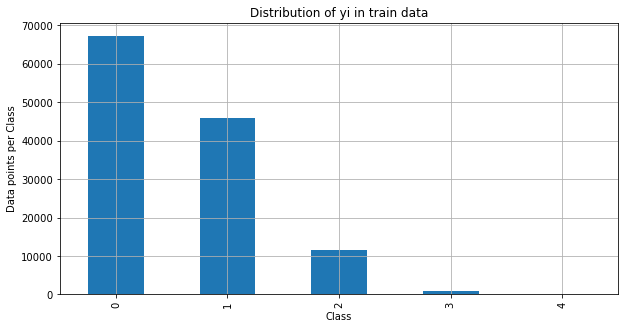

In [4]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareMulticlass()

plotDf(reducedDf['label'])


In [5]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(reducedDf)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(reducedDf_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)

In [6]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

## No feature selection

#### K-fold cross validation on dos

In [7]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9623799574271897,
 'Mean Training Precision': 0.978830303515329,
 'Mean Training Recall': 0.9271887311234023,
 'Mean Training F1 Score': 0.9522686915286316,
 'Mean Validation Accuracy': 0.9623995762337776,
 'Mean Validation Precision': 0.9789746844824376,
 'Mean Validation Recall': 0.927056726514276,
 'Mean Validation F1 Score': 0.9522714022527208}

#### K-fold cross validation on dos Standard Scaler

In [8]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.989919857175088,
 'Mean Training Precision': 0.988899290857508,
 'Mean Training Recall': 0.9862098846710257,
 'Mean Training F1 Score': 0.9875527402805331,
 'Mean Validation Accuracy': 0.989856096053677,
 'Mean Validation Precision': 0.9888078143416228,
 'Mean Validation Recall': 0.9861350374267499,
 'Mean Validation F1 Score': 0.9874670394805423}

#### Stratified cross validation on dos

In [9]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9677260822224184,
 'Mean Training Precision': 0.9835554883163347,
 'Mean Training Recall': 0.9359515773719644,
 'Mean Training F1 Score': 0.9591244066287826,
 'Mean Validation Accuracy': 0.967617197845855,
 'Mean Validation Precision': 0.9836878873643469,
 'Mean Validation Recall': 0.9355493342770508,
 'Mean Validation F1 Score': 0.9589699764474385}

#### Stratified cross validation on dos Standard Scaler

In [10]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.989914952473441,
 'Mean Training Precision': 0.9888942777984878,
 'Mean Training Recall': 0.9862027425635682,
 'Mean Training F1 Score': 0.9875466569824736,
 'Mean Validation Accuracy': 0.9898649245166415,
 'Mean Validation Precision': 0.9888259545457666,
 'Mean Validation Recall': 0.9861519925792243,
 'Mean Validation F1 Score': 0.9874842414772772}

#### Predict on dos

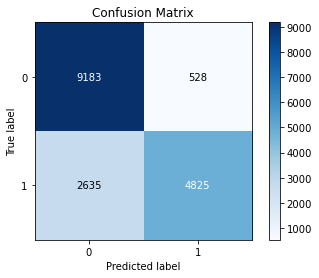

Accuracy: 0.81579 
Precision: 0.90136 
Recall: 0.64678 
F-measure: 0.75314 


In [11]:
y_dos_prediction = logisticRegression(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

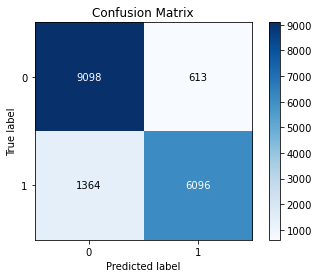

Accuracy: 0.88486 
Precision: 0.90863 
Recall: 0.81716 
F-measure: 0.86047 


In [12]:
y_dos_prediction = logisticRegression(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [13]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.8755962008284282,
 'Mean Training Precision': 0.7963166735984245,
 'Mean Training Recall': 0.19729739817308117,
 'Mean Training F1 Score': 0.30844147941979033,
 'Mean Validation Accuracy': 0.8755931178598155,
 'Mean Validation Precision': 0.8083017194082303,
 'Mean Validation Recall': 0.1979490921764083,
 'Mean Validation F1 Score': 0.3094624822078397}

#### K-fold cross validation on probe Standard Scaler

In [14]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9586422323232304,
 'Mean Training Precision': 0.8715981637542113,
 'Mean Training Recall': 0.8440450563689226,
 'Mean Training F1 Score': 0.8575985580958803,
 'Mean Validation Accuracy': 0.9583159316753761,
 'Mean Validation Precision': 0.8700326987549776,
 'Mean Validation Recall': 0.8433586918960172,
 'Mean Validation F1 Score': 0.8564355433480053}

#### Stratified cross validation on probe

In [15]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.8730560436430344,
 'Mean Training Precision': 0.7796874943710099,
 'Mean Training Recall': 0.17891291995799388,
 'Mean Training F1 Score': 0.2815839222563688,
 'Mean Validation Accuracy': 0.8728213137057887,
 'Mean Validation Precision': 0.7735688135933689,
 'Mean Validation Recall': 0.17796221998100695,
 'Mean Validation F1 Score': 0.27941520644990614}

#### Stratified cross validation on probe Standard Scaler

In [16]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9586042572440492,
 'Mean Training Precision': 0.8713923739970475,
 'Mean Training Recall': 0.8440097540594739,
 'Mean Training F1 Score': 0.8574812504887375,
 'Mean Validation Accuracy': 0.9584678320120638,
 'Mean Validation Precision': 0.871042254658861,
 'Mean Validation Recall': 0.8435143809951487,
 'Mean Validation F1 Score': 0.8570130571398797}

#### Predict on probe

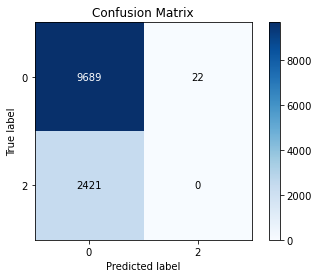

Accuracy: 0.79863 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


In [17]:
y_probe_prediction = logisticRegression(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

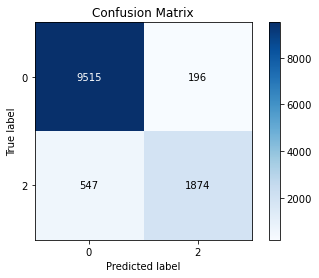

Accuracy: 0.93876 
Precision: 0.90531 
Recall: 0.77406 
F-measure: 0.83456 


In [18]:
y_probe_prediction = logisticRegression(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [19]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9855717168730985,
 'Mean Training Precision': 0.6286889548057513,
 'Mean Training Recall': 0.022339932740488518,
 'Mean Training F1 Score': 0.04302110667478458,
 'Mean Validation Accuracy': 0.9854985431311434,
 'Mean Validation Precision': 0.5454761904761904,
 'Mean Validation Recall': 0.02151570950794046,
 'Mean Validation F1 Score': 0.04097677502540685}

#### K-fold cross validation on r2l Standard Scaler

In [20]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9921550069034513,
 'Mean Training Precision': 0.7405773298624561,
 'Mean Training Recall': 0.7095397657813326,
 'Mean Training F1 Score': 0.7246957039786569,
 'Mean Validation Accuracy': 0.9921127033285121,
 'Mean Validation Precision': 0.7362812134657182,
 'Mean Validation Recall': 0.7083492300983765,
 'Mean Validation F1 Score': 0.7216602018074131}

#### Stratified cross validation on r2l

In [21]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9855652133632361,
 'Mean Training Precision': 0.6223246007149215,
 'Mean Training Recall': 0.02210981145251397,
 'Mean Training F1 Score': 0.04258795148454451,
 'Mean Validation Accuracy': 0.9854692862595368,
 'Mean Validation Precision': 0.5638095238095239,
 'Mean Validation Recall': 0.021151515151515154,
 'Mean Validation F1 Score': 0.0402637150070812}

#### Stratified cross validation on r2l Standard Scaler

In [22]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9921761438193861,
 'Mean Training Precision': 0.7410671161457842,
 'Mean Training Recall': 0.7111103351955307,
 'Mean Training F1 Score': 0.7257650819069336,
 'Mean Validation Accuracy': 0.9921566014847893,
 'Mean Validation Precision': 0.7390250302486812,
 'Mean Validation Recall': 0.7136767676767677,
 'Mean Validation F1 Score': 0.725624273017506}

#### Predict on r2l

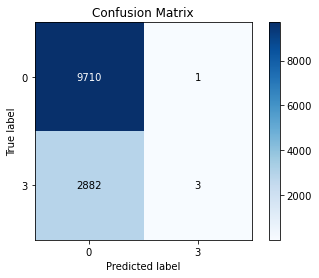

Accuracy: 0.77112 
Precision: 0.75000 
Recall: 0.00104 
F-measure: 0.00208 


In [23]:
y_r2l_prediction = logisticRegression(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

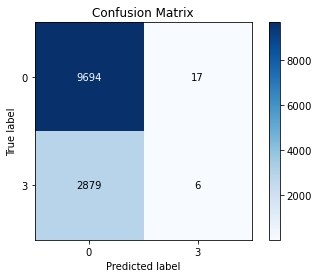

Accuracy: 0.77009 
Precision: 0.26087 
Recall: 0.00208 
F-measure: 0.00413 


In [24]:
y_r2l_prediction = logisticRegression(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [25]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_divisi

>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60612, 1=44, Test: 0=6731, 1=8


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60607, 1=49, Test: 0=6736, 1=3


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9992597538421515,
 'Mean Training Precision': 0.155,
 'Mean Training Recall': 0.07996453900709219,
 'Mean Training F1 Score': 0.1054987459000579,
 'Mean Validation Accuracy': 0.9991690800218225,
 'Mean Validation Precision': 0.05,
 'Mean Validation Recall': 0.02,
 'Mean Validation F1 Score': 0.028571428571428574}

#### K-fold cross validation on u2r Standard Scaler

In [26]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9996241066349869,
 'Mean Training Precision': 0.9284434339606754,
 'Mean Training Recall': 0.5555848990003873,
 'Mean Training F1 Score': 0.6949798976979944,
 'Mean Validation Accuracy': 0.9995400241210755,
 'Mean Validation Precision': 0.7916666666666667,
 'Mean Validation Recall': 0.5291666666666667,
 'Mean Validation F1 Score': 0.6176373626373627}

#### Stratified cross validation on u2r

In [27]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9993438349129887,
 'Mean Training Precision': 0.4007328042328043,
 'Mean Training Recall': 0.20716928769657725,
 'Mean Training F1 Score': 0.27271232588962496,
 'Mean Validation Accuracy': 0.9992284338077262,
 'Mean Validation Precision': 0.21666666666666665,
 'Mean Validation Recall': 0.1,
 'Mean Validation F1 Score': 0.13571428571428573}

#### Stratified cross validation on u2r Standard Scaler

In [28]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9996274039180257,
 'Mean Training Precision': 0.9350505382229519,
 'Mean Training Recall': 0.555550416281221,
 'Mean Training F1 Score': 0.6966607096347646,
 'Mean Validation Accuracy': 0.9995400241210758,
 'Mean Validation Precision': 0.7083333333333334,
 'Mean Validation Recall': 0.5200000000000001,
 'Mean Validation F1 Score': 0.5944444444444444}

#### Predict on u2r

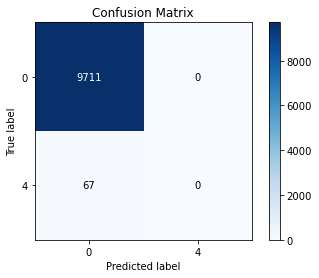

Accuracy: 0.99315 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
y_u2r_prediction = logisticRegression(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

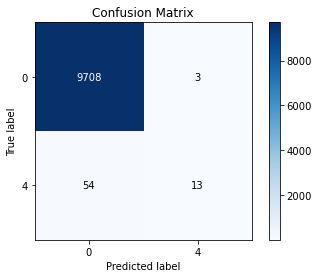

Accuracy: 0.99417 
Precision: 0.81250 
Recall: 0.19403 
F-measure: 0.31325 


In [30]:
y_u2r_prediction = logisticRegression(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

## Feature Selection

In [31]:

X_dos_rfe, rfecolname_dos = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_dos, y_dos, 13)
X_probe_rfe, rfecolname_probe = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_probe, y_probe, 13)
X_r2l_rfe, rfecolname_r2l = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_r2l, y_r2l, 13)
X_u2r_rfe, rfecolname_u2r = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_u2r, y_u2r, 13)

X_dos_test_rfe=X_dos_test.values[:,rfecolname_dos]
X_probe_test_rfe=X_probe_test.values[:,rfecolname_probe]
X_r2l_test_rfe=X_r2l_test.values[:,rfecolname_r2l]
X_u2r_test_rfe=X_u2r_test.values[:,rfecolname_u2r]

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

In [32]:
X_dos_rfe_ss, rfecolname_dosSS = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_dos_ss, y_dos, 13)
X_probe_rfe_ss, rfecolname_probeSS = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_probe_ss, y_probe, 13)
X_r2l_rfe_ss, rfecolname_r2lSS = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_r2l_ss, y_r2l, 13)
X_u2r_rfe_ss, rfecolname_u2rSS = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_u2r_ss, y_u2r, 13)

X_dos_test_rfe_ss=X_dos_test_ss[:,rfecolname_dosSS]
X_probe_test_rfe_ss=X_probe_test_ss[:,rfecolname_probeSS]
X_r2l_test_rfe_ss=X_r2l_test_ss[:,rfecolname_r2lSS]
X_u2r_test_rfe_ss=X_u2r_test_ss[:,rfecolname_u2rSS]

#### K-fold cross validation on dos

In [33]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9613117134084735,
 'Mean Training Precision': 0.9850804289654425,
 'Mean Training Recall': 0.9184939092848537,
 'Mean Training F1 Score': 0.9506225203260463,
 'Mean Validation Accuracy': 0.9612695329743091,
 'Mean Validation Precision': 0.9849540080448957,
 'Mean Validation Recall': 0.9185076625776045,
 'Mean Validation F1 Score': 0.9505645292597624}

#### K-fold cross validation on dos Standard Scaler

In [34]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9846747692337876,
 'Mean Training Precision': 0.9869483264659632,
 'Mean Training Recall': 0.9750979595969556,
 'Mean Training F1 Score': 0.9809873387473044,
 'Mean Validation Accuracy': 0.9846296459786352,
 'Mean Validation Precision': 0.9868805875062054,
 'Mean Validation Recall': 0.9750286019064622,
 'Mean Validation F1 Score': 0.980915644385558}

#### Stratified cross validation on dos

In [35]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9613195609311086,
 'Mean Training Precision': 0.9850909284526651,
 'Mean Training Recall': 0.9185035195148299,
 'Mean Training F1 Score': 0.9506325705213567,
 'Mean Validation Accuracy': 0.9612695329743092,
 'Mean Validation Precision': 0.9849878855290385,
 'Mean Validation Recall': 0.9184794018848559,
 'Mean Validation F1 Score': 0.9505665371423989}

#### Stratified cross validation on dos Standard Scaler

In [36]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9846747692337875,
 'Mean Training Precision': 0.9869508118787081,
 'Mean Training Recall': 0.9750957441235135,
 'Mean Training F1 Score': 0.9809874458290194,
 'Mean Validation Accuracy': 0.9846208175156704,
 'Mean Validation Precision': 0.9868682244789051,
 'Mean Validation Recall': 0.9750473897561127,
 'Mean Validation F1 Score': 0.980919046475287}

#### Predict on dos

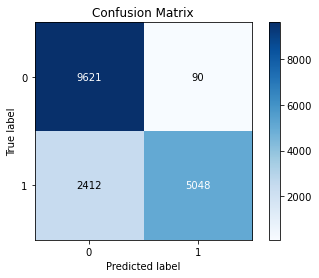

Accuracy: 0.85429 
Precision: 0.98248 
Recall: 0.67668 
F-measure: 0.80140 


In [37]:
y_dos_rfe_prediction = logisticRegression(X_dos_rfe, y_dos).predict(X_dos_test_rfe)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

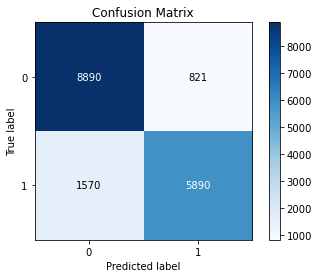

Accuracy: 0.86075 
Precision: 0.87766 
Recall: 0.78954 
F-measure: 0.83128 


In [38]:
y_dos_rfe_prediction = logisticRegression(X_dos_rfe_ss, y_dos).predict(X_dos_test_rfe_ss)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [39]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9552947924734569,
 'Mean Training Precision': 0.8503007080628808,
 'Mean Training Recall': 0.845942203896936,
 'Mean Training F1 Score': 0.8481139412647402,
 'Mean Validation Accuracy': 0.9551133455444608,
 'Mean Validation Precision': 0.8493925242873914,
 'Mean Validation Recall': 0.8454716050319064,
 'Mean Validation F1 Score': 0.8474117400519393}

#### K-fold cross validation on probe Standard Scaler

In [40]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9514283582197909,
 'Mean Training Precision': 0.8329077789420574,
 'Mean Training Recall': 0.8391453882525204,
 'Mean Training F1 Score': 0.8360146085623427,
 'Mean Validation Accuracy': 0.951290531889151,
 'Mean Validation Precision': 0.8327872127253013,
 'Mean Validation Recall': 0.8381004269881919,
 'Mean Validation F1 Score': 0.8353761144158979}

#### Stratified cross validation on probe

In [41]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9552821340873543,
 'Mean Training Precision': 0.8502193810462589,
 'Mean Training Recall': 0.8459544160553797,
 'Mean Training F1 Score': 0.8480800108974602,
 'Mean Validation Accuracy': 0.9551639816608736,
 'Mean Validation Precision': 0.8495894814503531,
 'Mean Validation Recall': 0.8459163421403278,
 'Mean Validation F1 Score': 0.8477351161163738}

#### Stratified cross validation on probe Standard Scaler

In [42]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9515338447178969,
 'Mean Training Precision': 0.8333351234075312,
 'Mean Training Recall': 0.8393960068728392,
 'Mean Training F1 Score': 0.8363544605526171,
 'Mean Validation Accuracy': 0.9513664892687906,
 'Mean Validation Precision': 0.8332308839186509,
 'Mean Validation Recall': 0.8382808324560693,
 'Mean Validation F1 Score': 0.8357024631015948}

#### Predict on probe

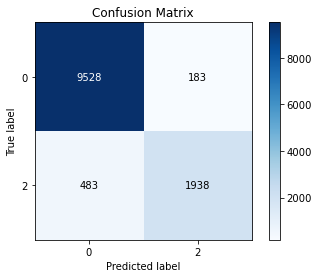

Accuracy: 0.94510 
Precision: 0.91372 
Recall: 0.80050 
F-measure: 0.85337 


In [43]:
y_probe_rfe_prediction = logisticRegression(X_probe_rfe, y_probe).predict(X_probe_test_rfe)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

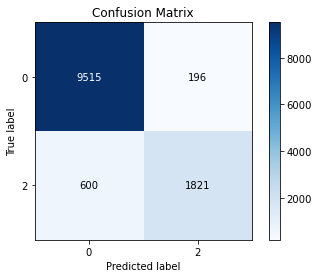

Accuracy: 0.93439 
Precision: 0.90283 
Recall: 0.75217 
F-measure: 0.82064 


In [44]:
y_probe_rfe_prediction = logisticRegression(X_probe_rfe_ss, y_probe).predict(X_probe_test_rfe_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [45]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9840742581576112,
 'Mean Training Precision': 0.07289548983387473,
 'Mean Training Recall': 0.008034338446377586,
 'Mean Training F1 Score': 0.014471975949371274,
 'Mean Validation Accuracy': 0.9840791330063811,
 'Mean Validation Precision': 0.07080086580086581,
 'Mean Validation Recall': 0.007976268818544473,
 'Mean Validation F1 Score': 0.014201668381780655}

#### K-fold cross validation on r2l Standard Scaler

In [46]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.989766551951395,
 'Mean Training Precision': 0.672043442265808,
 'Mean Training Recall': 0.5799044288428028,
 'Mean Training F1 Score': 0.6225325520767733,
 'Mean Validation Accuracy': 0.9898006716617067,
 'Mean Validation Precision': 0.6723267133127333,
 'Mean Validation Recall': 0.5822918235760148,
 'Mean Validation F1 Score': 0.6232210003862473}

#### Stratified cross validation on r2l

In [47]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9840661287108035,
 'Mean Training Precision': 0.07344842494808808,
 'Mean Training Recall': 0.008151935355147646,
 'Mean Training F1 Score': 0.014673538096561379,
 'Mean Validation Accuracy': 0.9840498739932965,
 'Mean Validation Precision': 0.06569347319347318,
 'Mean Validation Recall': 0.008020202020202021,
 'Mean Validation F1 Score': 0.014243743338587508}

#### Stratified cross validation on r2l Standard Scaler

In [48]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9897828109507522,
 'Mean Training Precision': 0.6723894336394964,
 'Mean Training Recall': 0.581571104349561,
 'Mean Training F1 Score': 0.6236656170729507,
 'Mean Validation Accuracy': 0.9897567756469074,
 'Mean Validation Precision': 0.6724266022856508,
 'Mean Validation Recall': 0.5809494949494949,
 'Mean Validation F1 Score': 0.6225661853842166}

#### Predict on r2l

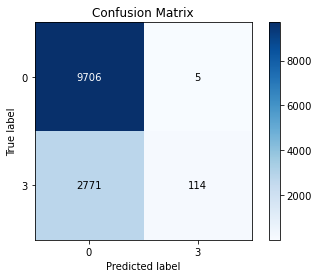

Accuracy: 0.77961 
Precision: 0.95798 
Recall: 0.03951 
F-measure: 0.07590 


In [49]:
y_r2l_rfe_prediction = logisticRegression(X_r2l_rfe, y_r2l).predict(X_r2l_test_rfe)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

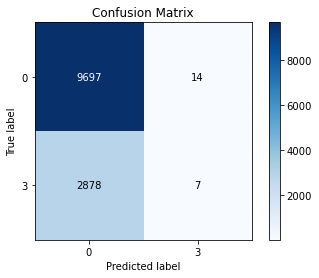

Accuracy: 0.77040 
Precision: 0.33333 
Recall: 0.00243 
F-measure: 0.00482 


In [50]:
y_r2l_rfe_prediction = logisticRegression(X_r2l_rfe_ss, y_r2l).predict(X_r2l_test_rfe_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [51]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9992614024293095,
 'Mean Training Precision': 0.5937878787878789,
 'Mean Training Recall': 0.1344688710148932,
 'Mean Training F1 Score': 0.21922096122511742,
 'Mean Validation Accuracy': 0.9992581007933359,
 'Mean Validation Precision': 0.45,
 'Mean Validation Recall': 0.12083333333333332,
 'Mean Validation F1 Score': 0.18722222222222223}

#### K-fold cross validation on u2r Standard Scaler

In [52]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9993075649354652,
 'Mean Training Precision': 0.8607142857142855,
 'Mean Training Recall': 0.12173141437215709,
 'Mean Training F1 Score': 0.21159006407304637,
 'Mean Validation Accuracy': 0.9992877853919981,
 'Mean Validation Precision': 0.5,
 'Mean Validation Recall': 0.11416666666666667,
 'Mean Validation F1 Score': 0.1838095238095238}

#### Stratified cross validation on u2r

In [53]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9992614024293097,
 'Mean Training Precision': 0.592020202020202,
 'Mean Training Recall': 0.1345513413506013,
 'Mean Training F1 Score': 0.2190365185584971,
 'Mean Validation Accuracy': 0.9992581007933359,
 'Mean Validation Precision': 0.35,
 'Mean Validation Recall': 0.13,
 'Mean Validation F1 Score': 0.18571428571428572}

#### Stratified cross validation on u2r Standard Scaler

In [54]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9993075649354652,
 'Mean Training Precision': 0.8597619047619046,
 'Mean Training Recall': 0.12173913043478261,
 'Mean Training F1 Score': 0.2114085336314874,
 'Mean Validation Accuracy': 0.9992729463951144,
 'Mean Validation Precision': 0.4833333333333333,
 'Mean Validation Recall': 0.11666666666666665,
 'Mean Validation F1 Score': 0.18214285714285716}

#### Predict on u2r

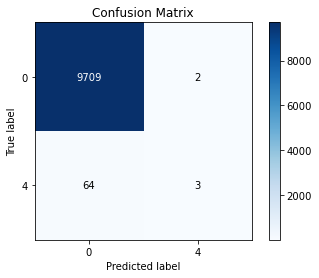

Accuracy: 0.99325 
Precision: 0.60000 
Recall: 0.04478 
F-measure: 0.08333 


In [55]:
y_u2r_rfe_prediction = logisticRegression(X_u2r_rfe, y_u2r).predict(X_u2r_test_rfe)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

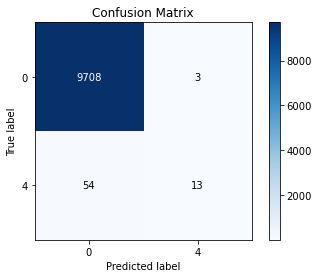

Accuracy: 0.99417 
Precision: 0.81250 
Recall: 0.19403 
F-measure: 0.31325 


In [56]:
y_u2r_rfe_prediction = logisticRegression(X_u2r_rfe_ss, y_u2r).predict(X_u2r_test_rfe_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

## Binary dataset no feature selection

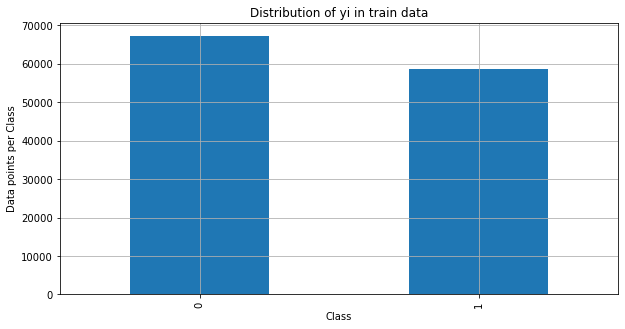

In [57]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareBinary()
plotDf(reducedDf['label'])

x_df, y_df = getXandY(reducedDf)
x_df_test, y_df_test = getXandY(reducedDf_test)

x_df_ss = standardScaler(x_df)
x_df_test_ss = standardScaler(x_df_test)

#### K-fold cross validation

In [58]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(x_df), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.8777789213617796,
 'Mean Training Precision': 0.8755807029933129,
 'Mean Training Recall': 0.8602103489449535,
 'Mean Training F1 Score': 0.8676162135907795,
 'Mean Validation Accuracy': 0.8778230787794445,
 'Mean Validation Precision': 0.8757750173061865,
 'Mean Validation Recall': 0.8601103469526364,
 'Mean Validation F1 Score': 0.8676270927786236}

#### K-fold cross validation Standard Scaler

In [59]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(x_df_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9462062856678743,
 'Mean Training Precision': 0.948517314424044,
 'Mean Training Recall': 0.9351770590619866,
 'Mean Training F1 Score': 0.9417998782648873,
 'Mean Validation Accuracy': 0.9461472354431185,
 'Mean Validation Precision': 0.9485391485139225,
 'Mean Validation Recall': 0.9350210869865565,
 'Mean Validation F1 Score': 0.9417297472552013}

#### Predict

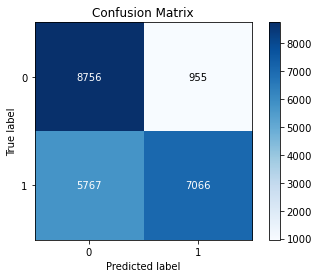

Accuracy: 0.70183 
Precision: 0.88094 
Recall: 0.55061 
F-measure: 0.67766 


In [60]:
y_prediction = logisticRegression(x_df, y_df).predict(x_df_test)
plotConfusionMatrix(y_prediction, y_df_test, 1)

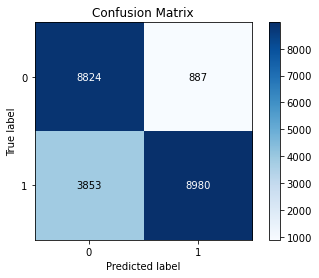

Accuracy: 0.78974 
Precision: 0.91010 
Recall: 0.69976 
F-measure: 0.79119 


In [61]:
y_prediction = logisticRegression(x_df_ss, y_df).predict(x_df_test_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

## Binary dataset feature selection

In [62]:
X_df_rfe, rfecolname = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), x_df, y_df, 13)
X_df_test_rfe=x_df_test.values[:,rfecolname]

In [63]:
X_df_rfe_ss, rfecolname_ss = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), x_df_ss, y_df, 13)
X_df_test_rfe_ss=x_df_test_ss[:,rfecolname_ss]

#### K-fold cross validation

In [64]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_df_rfe), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9306623910261737,
 'Mean Training Precision': 0.9435148043330175,
 'Mean Training Recall': 0.905213530565328,
 'Mean Training F1 Score': 0.9239673315710231,
 'Mean Validation Accuracy': 0.9306359264269928,
 'Mean Validation Precision': 0.9434307817426074,
 'Mean Validation Recall': 0.9052300651724219,
 'Mean Validation F1 Score': 0.9239278977864304}

#### K-fold cross validation Standard Scaler

In [65]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_df_rfe_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9335219102623586,
 'Mean Training Precision': 0.9342998285321563,
 'Mean Training Recall': 0.9220005331741093,
 'Mean Training F1 Score': 0.928109359095509,
 'Mean Validation Accuracy': 0.9334460947549319,
 'Mean Validation Precision': 0.9342246091295985,
 'Mean Validation Recall': 0.9219087608613943,
 'Mean Validation F1 Score': 0.9280198016651904}

#### Predict

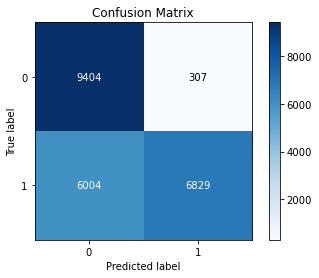

Accuracy: 0.72006 
Precision: 0.95698 
Recall: 0.53214 
F-measure: 0.68396 


In [66]:
y_prediction = logisticRegression(X_df_rfe, y_df).predict(X_df_test_rfe)
plotConfusionMatrix(y_prediction, y_df_test, 1)

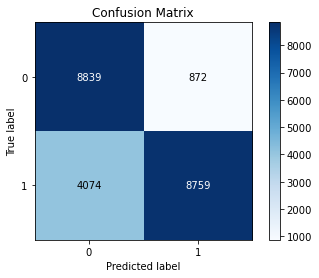

Accuracy: 0.78061 
Precision: 0.90946 
Recall: 0.68254 
F-measure: 0.77983 


In [67]:
y_prediction = logisticRegression(X_df_rfe_ss, y_df).predict(X_df_test_rfe_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

# Reduced DF, oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

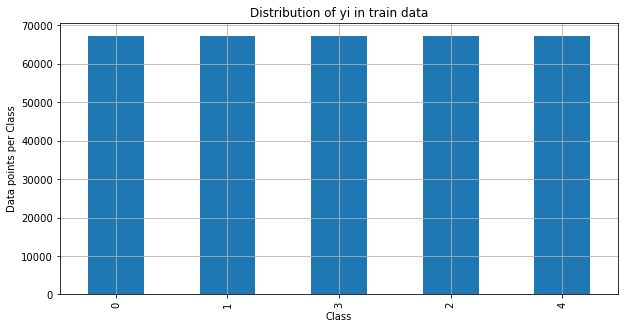

In [68]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareMulticlass()

x_df, y_df = getXandY(reducedDf)
x_df_test, y_df_test = getXandY(reducedDf_test)


oversampled_df = overSampledDF(x_df, y_df)
oversampled_df_test = overSampledDF(x_df_test, y_df_test)

plotDf(oversampled_df['label'])

In [69]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(oversampled_df)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(oversampled_df_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)

In [70]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

## No feature selection

#### K-fold cross validation on dos

In [71]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.95691215304543,
 'Mean Training Precision': 0.9732190825334432,
 'Mean Training Recall': 0.9392731849059883,
 'Mean Training F1 Score': 0.9559124966523024,
 'Mean Validation Accuracy': 0.9540333341543528,
 'Mean Validation Precision': 0.9666895040186285,
 'Mean Validation Recall': 0.938942660700271,
 'Mean Validation F1 Score': 0.9524323124926448}

#### K-fold cross validation on dos Standard Scaler

In [72]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.989900789733326,
 'Mean Training Precision': 0.9910118614158531,
 'Mean Training Recall': 0.9887300917282458,
 'Mean Training F1 Score': 0.9898696543114387,
 'Mean Validation Accuracy': 0.989575726178295,
 'Mean Validation Precision': 0.9888211510730434,
 'Mean Validation Recall': 0.9886382249800828,
 'Mean Validation F1 Score': 0.9887212636765069}

#### Stratified cross validation on dos

In [73]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9497357515414354,
 'Mean Training Precision': 0.965934626636846,
 'Mean Training Recall': 0.9323578914023978,
 'Mean Training F1 Score': 0.9488454374003601,
 'Mean Validation Accuracy': 0.949608825206494,
 'Mean Validation Precision': 0.965707245442721,
 'Mean Validation Recall': 0.9323167257911134,
 'Mean Validation F1 Score': 0.9487120747108749}

#### Stratified cross validation on dos Standard Scaler

In [74]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9898859403242088,
 'Mean Training Precision': 0.9910055701844241,
 'Mean Training Recall': 0.9887458400989635,
 'Mean Training F1 Score': 0.9898744046625039,
 'Mean Validation Accuracy': 0.9897910684828795,
 'Mean Validation Precision': 0.9908788594554562,
 'Mean Validation Recall': 0.9886848288852745,
 'Mean Validation F1 Score': 0.9897797697015269}

#### Predict on dos

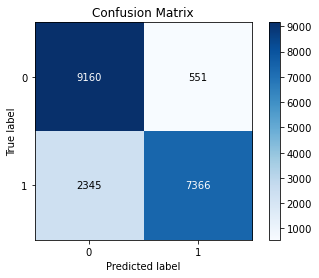

Accuracy: 0.85089 
Precision: 0.93040 
Recall: 0.75852 
F-measure: 0.83572 


In [75]:
y_dos_prediction = logisticRegression(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

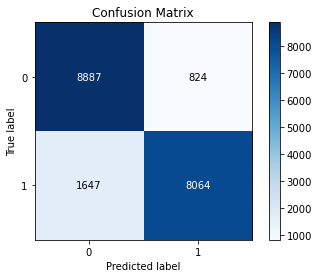

Accuracy: 0.87277 
Precision: 0.90729 
Recall: 0.83040 
F-measure: 0.86714 


In [76]:
y_dos_prediction = logisticRegression(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [77]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.745508409313229,
 'Mean Training Precision': 0.8533182934783351,
 'Mean Training Recall': 0.5933120339194107,
 'Mean Training F1 Score': 0.6991581749800544,
 'Mean Validation Accuracy': 0.7416094329005458,
 'Mean Validation Precision': 0.7124787456761827,
 'Mean Validation Recall': 0.5922056037147385,
 'Mean Validation F1 Score': 0.6266515676703174}

#### K-fold cross validation on probe Standard Scaling

In [78]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9490939519024062,
 'Mean Training Precision': 0.9368314740128463,
 'Mean Training Recall': 0.9616994625424125,
 'Mean Training F1 Score': 0.9491016572658248,
 'Mean Validation Accuracy': 0.944656774690556,
 'Mean Validation Precision': 0.8396332105154982,
 'Mean Validation Recall': 0.9594566383369324,
 'Mean Validation F1 Score': 0.8895566867975753}

#### Stratified cross validation on probe

In [79]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.7473291779226794,
 'Mean Training Precision': 0.8469841153872002,
 'Mean Training Recall': 0.6037334583544081,
 'Mean Training F1 Score': 0.7049637444805457,
 'Mean Validation Accuracy': 0.7473086059766585,
 'Mean Validation Precision': 0.8469606643514445,
 'Mean Validation Recall': 0.6037450370412508,
 'Mean Validation F1 Score': 0.7049460397355632}

#### Stratified cross validation on probe Standard Scaling

In [80]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9492812091836443,
 'Mean Training Precision': 0.9374627808570875,
 'Mean Training Recall': 0.9627891699550947,
 'Mean Training F1 Score': 0.9499571948639349,
 'Mean Validation Accuracy': 0.9492226526044923,
 'Mean Validation Precision': 0.9373992352749916,
 'Mean Validation Recall': 0.9627429399589754,
 'Mean Validation F1 Score': 0.949899564909334}

#### Predict on probe

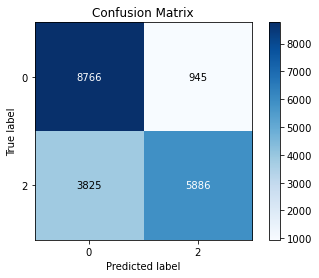

Accuracy: 0.75440 
Precision: 0.86166 
Recall: 0.60612 
F-measure: 0.71164 


In [81]:
y_probe_rfe_prediction = logisticRegression(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

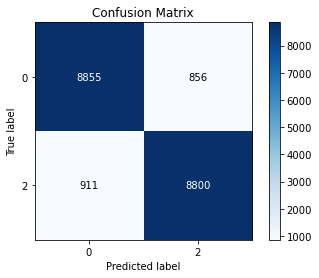

Accuracy: 0.90902 
Precision: 0.91135 
Recall: 0.90619 
F-measure: 0.90876 


In [82]:
y_probe_rfe_prediction = logisticRegression(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [83]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.7035936562258758,
 'Mean Training Precision': 0.9118101805447789,
 'Mean Training Recall': 0.4479077668285032,
 'Mean Training F1 Score': 0.5954698176413891,
 'Mean Validation Accuracy': 0.6586055229662773,
 'Mean Validation Precision': 0.5709852590059425,
 'Mean Validation Recall': 0.4440067234380211,
 'Mean Validation F1 Score': 0.38714348480563265}

#### K-fold cross validation on r2l Standard Scaling

In [84]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9747561009231476,
 'Mean Training Precision': 0.9679400970735672,
 'Mean Training Recall': 0.9813239088277111,
 'Mean Training F1 Score': 0.9745860178557866,
 'Mean Validation Accuracy': 0.9710513949432948,
 'Mean Validation Precision': 0.6423625694993109,
 'Mean Validation Recall': 0.9799410275480778,
 'Mean Validation F1 Score': 0.7153541408169639}

#### Stratified cross validation on r2l

In [85]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.6849775185958753,
 'Mean Training Precision': 0.9024598358667015,
 'Mean Training Recall': 0.41776004128863764,
 'Mean Training F1 Score': 0.569142567507164,
 'Mean Validation Accuracy': 0.6853278446455372,
 'Mean Validation Precision': 0.9036345405378692,
 'Mean Validation Recall': 0.41827766727544013,
 'Mean Validation F1 Score': 0.5697874127736019}

#### Stratified cross validation on r2l Standard Scaling

In [86]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9750761853650219,
 'Mean Training Precision': 0.9683624609805136,
 'Mean Training Recall': 0.9822434732303881,
 'Mean Training F1 Score': 0.9752535608881425,
 'Mean Validation Accuracy': 0.9749342818761484,
 'Mean Validation Precision': 0.9681976133939415,
 'Mean Validation Recall': 0.9821362479491654,
 'Mean Validation F1 Score': 0.9751151149325047}

#### Predict on r2l

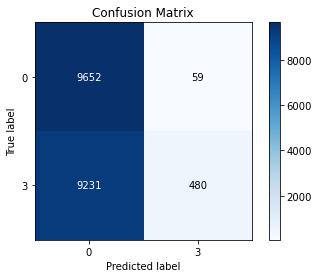

Accuracy: 0.52168 
Precision: 0.89054 
Recall: 0.04943 
F-measure: 0.09366 


In [87]:
y_r2l_rfe_prediction = logisticRegression(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

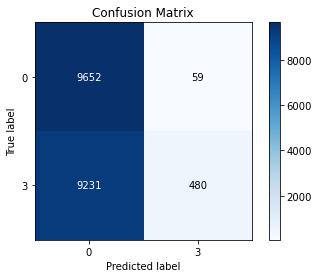

Accuracy: 0.52168 
Precision: 0.89054 
Recall: 0.04943 
F-measure: 0.09366 


In [88]:
y_probe_rfy_r2l_rfe_predictione_prediction = logisticRegression(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [89]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.96632498501768,
 'Mean Training Precision': 0.9426250100357423,
 'Mean Training Recall': 0.9910757223401907,
 'Mean Training F1 Score': 0.9661693313825234,
 'Mean Validation Accuracy': 0.9652011974697402,
 'Mean Validation Precision': 0.507475373208756,
 'Mean Validation Recall': 0.9717132486498684,
 'Mean Validation F1 Score': 0.5113172264588796}

#### K-fold cross validation on u2r Standard Scaling

In [90]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9852356220597327,
 'Mean Training Precision': 0.9730566449922557,
 'Mean Training Recall': 0.9974547796336954,
 'Mean Training F1 Score': 0.9851029266375739,
 'Mean Validation Accuracy': 0.9833022768207268,
 'Mean Validation Precision': 0.5126174498909766,
 'Mean Validation Recall': 0.989608394185859,
 'Mean Validation F1 Score': 0.523566823332472}

#### Stratified cross validation on u2r

In [91]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9638500530610289,
 'Mean Training Precision': 0.939561120487682,
 'Mean Training Recall': 0.9917453942394499,
 'Mean Training F1 Score': 0.9648905914394836,
 'Mean Validation Accuracy': 0.9635005085873747,
 'Mean Validation Precision': 0.9392046735860123,
 'Mean Validation Recall': 0.9915062898136396,
 'Mean Validation F1 Score': 0.9645708531355076}

#### Stratified cross validation on u2r Standard Scaling

In [92]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9854105105149534,
 'Mean Training Precision': 0.9732644072759455,
 'Mean Training Recall': 0.9982428262117422,
 'Mean Training F1 Score': 0.9855953544921856,
 'Mean Validation Accuracy': 0.9853065679667505,
 'Mean Validation Precision': 0.9730666652782866,
 'Mean Validation Recall': 0.9982477952633854,
 'Mean Validation F1 Score': 0.9854952275048442}

#### Predict on u2r

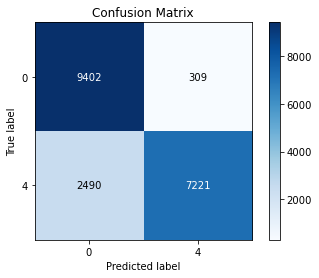

Accuracy: 0.85589 
Precision: 0.95896 
Recall: 0.74359 
F-measure: 0.83765 


In [93]:
y_u2r_rfe_prediction = logisticRegression(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

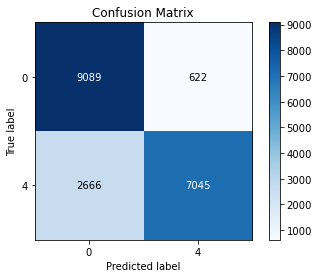

Accuracy: 0.83071 
Precision: 0.91887 
Recall: 0.72547 
F-measure: 0.81080 


In [94]:
y_u2r_rfe_prediction = logisticRegression(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

## Feature selection

In [95]:
X_dos_rfe, rfecolname_dos = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_dos, y_dos, 13)
X_probe_rfe, rfecolname_probe = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_probe, y_probe, 13)
X_r2l_rfe, rfecolname_r2l = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_r2l, y_r2l, 13)
X_u2r_rfe, rfecolname_u2r = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_u2r, y_u2r, 13)

X_dos_test_rfe=X_dos_test.values[:,rfecolname_dos]
X_probe_test_rfe=X_probe_test.values[:,rfecolname_probe]
X_r2l_test_rfe=X_r2l_test.values[:,rfecolname_r2l]
X_u2r_test_rfe=X_u2r_test.values[:,rfecolname_u2r]

In [96]:
X_dos_rfe_ss, rfecolname_dosSS = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_dos_ss, y_dos, 13)
X_probe_rfe_ss, rfecolname_probeSS = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_probe_ss, y_probe, 13)
X_r2l_rfe_ss, rfecolname_r2lSS = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_r2l_ss, y_r2l, 13)
X_u2r_rfe_ss, rfecolname_u2rSS = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), X_u2r_ss, y_u2r, 13)

X_dos_test_rfe_ss=X_dos_test_ss[:,rfecolname_dosSS]
X_probe_test_rfe_ss=X_probe_test_ss[:,rfecolname_probeSS]
X_r2l_test_rfe_ss=X_r2l_test_ss[:,rfecolname_r2lSS]
X_u2r_test_rfe_ss=X_u2r_test_ss[:,rfecolname_u2rSS]

#### K-fold cross validation on dos

In [97]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9606343637521135,
 'Mean Training Precision': 0.971714881578287,
 'Mean Training Recall': 0.9487627684792969,
 'Mean Training F1 Score': 0.9601006515648163,
 'Mean Validation Accuracy': 0.9597581152095221,
 'Mean Validation Precision': 0.9651733882363317,
 'Mean Validation Recall': 0.9490934455459141,
 'Mean Validation F1 Score': 0.9569816537458472}

#### K-fold cross validation on dos Standard Scaler

In [98]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9835007171210579,
 'Mean Training Precision': 0.9890842317898428,
 'Mean Training Recall': 0.9777775587219748,
 'Mean Training F1 Score': 0.9833982962576775,
 'Mean Validation Accuracy': 0.9831682000068668,
 'Mean Validation Precision': 0.9862994473867653,
 'Mean Validation Recall': 0.9777996029646765,
 'Mean Validation F1 Score': 0.9820197697546847}

#### Stratified cross validation on dos

In [99]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9609206275975136,
 'Mean Training Precision': 0.9724566709894665,
 'Mean Training Recall': 0.948711985128271,
 'Mean Training F1 Score': 0.9604374876633595,
 'Mean Validation Accuracy': 0.9608273884946243,
 'Mean Validation Precision': 0.9724101249484525,
 'Mean Validation Recall': 0.9485766431646164,
 'Mean Validation F1 Score': 0.9603403340042883}

#### Stratified cross validation on dos Standard Scaler

In [100]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9834800943055043,
 'Mean Training Precision': 0.9890893030857368,
 'Mean Training Recall': 0.977745769371929,
 'Mean Training F1 Score': 0.9833848180278745,
 'Mean Validation Accuracy': 0.9834355372090172,
 'Mean Validation Precision': 0.9890056496120275,
 'Mean Validation Recall': 0.9777408309702296,
 'Mean Validation F1 Score': 0.9833404405995795}

#### Predict on dos

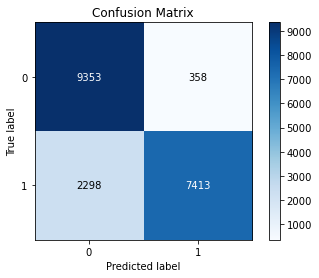

Accuracy: 0.86325 
Precision: 0.95393 
Recall: 0.76336 
F-measure: 0.84807 


In [101]:
y_dos_rfe_prediction = logisticRegression(X_dos_rfe, y_dos).predict(X_dos_test_rfe)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

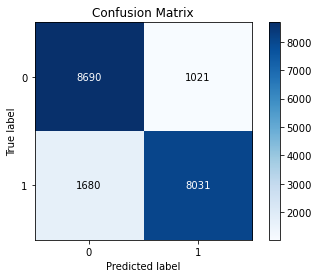

Accuracy: 0.86093 
Precision: 0.88721 
Recall: 0.82700 
F-measure: 0.85605 


In [102]:
y_dos_rfe_prediction = logisticRegression(X_dos_rfe_ss, y_dos).predict(X_dos_test_rfe_ss)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [103]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9487317852453915,
 'Mean Training Precision': 0.9408031391863183,
 'Mean Training Recall': 0.9566812659092536,
 'Mean Training F1 Score': 0.9486723557108897,
 'Mean Validation Accuracy': 0.9454956792509691,
 'Mean Validation Precision': 0.8467619208332812,
 'Mean Validation Recall': 0.9547680328140705,
 'Mean Validation F1 Score': 0.8922526396976764}

#### K-fold cross validation on probe Standard Scaler

In [104]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9514582953785009,
 'Mean Training Precision': 0.939010321793597,
 'Mean Training Recall': 0.9644267099414783,
 'Mean Training F1 Score': 0.9515482753627428,
 'Mean Validation Accuracy': 0.9470327048506573,
 'Mean Validation Precision': 0.8424068097638358,
 'Mean Validation Recall': 0.9624698232421632,
 'Mean Validation F1 Score': 0.892693920362241}

#### Stratified cross validation on probe

In [105]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9488967758413164,
 'Mean Training Precision': 0.9411994745970226,
 'Mean Training Recall': 0.9576199452079346,
 'Mean Training F1 Score': 0.9493387068499965,
 'Mean Validation Accuracy': 0.9488068643165531,
 'Mean Validation Precision': 0.941060035710683,
 'Mean Validation Recall': 0.9575901986815127,
 'Mean Validation F1 Score': 0.9492515703858044}

#### Stratified cross validation on probe Standard Scaler

In [106]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9517808502358402,
 'Mean Training Precision': 0.9392855379424345,
 'Mean Training Recall': 0.9660032303531947,
 'Mean Training F1 Score': 0.9524570404077775,
 'Mean Validation Accuracy': 0.9517618882753638,
 'Mean Validation Precision': 0.9392490756093756,
 'Mean Validation Recall': 0.9660098219563699,
 'Mean Validation F1 Score': 0.952439135230218}

#### Predict on probe

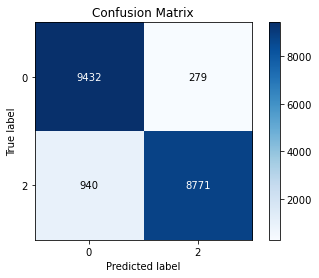

Accuracy: 0.93724 
Precision: 0.96917 
Recall: 0.90320 
F-measure: 0.93502 


In [107]:
y_probe_rfe_prediction = logisticRegression(X_probe_rfe, y_probe).predict(X_probe_test_rfe)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

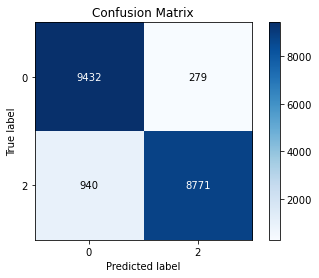

Accuracy: 0.93724 
Precision: 0.96917 
Recall: 0.90320 
F-measure: 0.93502 


In [108]:
y_r2l_rfe_prediction = logisticRegression(X_probe_rfe_ss, y_probe).predict(X_probe_test_rfe_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [109]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9395812757270864,
 'Mean Training Precision': 0.9327996466508063,
 'Mean Training Recall': 0.946325190640995,
 'Mean Training F1 Score': 0.9395039633112221,
 'Mean Validation Accuracy': 0.9352422544697399,
 'Mean Validation Precision': 0.5784445503559937,
 'Mean Validation Recall': 0.943593778710374,
 'Mean Validation F1 Score': 0.6207093852050163}

#### K-fold cross validation on r2l Standard Scaler

In [110]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9689524768809168,
 'Mean Training Precision': 0.9666476516062652,
 'Mean Training Recall': 0.9706851534209141,
 'Mean Training F1 Score': 0.9686500185654634,
 'Mean Validation Accuracy': 0.9610130858961506,
 'Mean Validation Precision': 0.6270303530803317,
 'Mean Validation Recall': 0.9665153622168141,
 'Mean Validation F1 Score': 0.6921555137137131}

#### Stratified cross validation on r2l

In [111]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9397776225202129,
 'Mean Training Precision': 0.9341630509608955,
 'Mean Training Recall': 0.9462436908473416,
 'Mean Training F1 Score': 0.9401645435049442,
 'Mean Validation Accuracy': 0.9397858595664669,
 'Mean Validation Precision': 0.9341562937244341,
 'Mean Validation Recall': 0.946275034181493,
 'Mean Validation F1 Score': 0.9401744511282363}

#### Stratified cross validation on r2l Standard Scaler

In [112]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9697238180712302,
 'Mean Training Precision': 0.9661094361363156,
 'Mean Training Recall': 0.9736011500495418,
 'Mean Training F1 Score': 0.9698407843331752,
 'Mean Validation Accuracy': 0.9697963961420788,
 'Mean Validation Precision': 0.9662160780493408,
 'Mean Validation Recall': 0.973642436337314,
 'Mean Validation F1 Score': 0.9699131525395444}

#### Predict on r2l

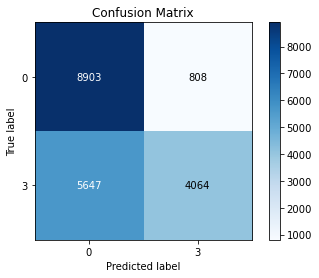

Accuracy: 0.66764 
Precision: 0.83415 
Recall: 0.41849 
F-measure: 0.55736 


In [113]:
y_r2l_rfe_prediction = logisticRegression(X_r2l_rfe, y_r2l).predict(X_r2l_test_rfe)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

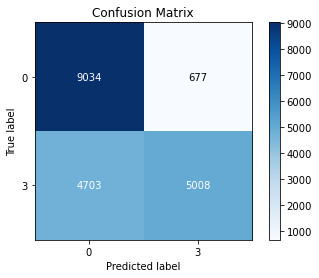

Accuracy: 0.72299 
Precision: 0.88091 
Recall: 0.51570 
F-measure: 0.65056 


In [114]:
y_r2l_rfe_prediction = logisticRegression(X_r2l_rfe_ss, y_r2l).predict(X_r2l_test_rfe_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [115]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.8818115202755632,
 'Mean Training Precision': 0.9118018466940768,
 'Mean Training Recall': 0.8421571119436176,
 'Mean Training F1 Score': 0.8755734983219103,
 'Mean Validation Accuracy': 0.8664956300118524,
 'Mean Validation Precision': 0.503498243796449,
 'Mean Validation Recall': 0.8344327662989635,
 'Mean Validation F1 Score': 0.45897456862812636}

#### K-fold cross validation on u2r Standard Scaler

In [116]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9708630930025499,
 'Mean Training Precision': 0.9460924900832344,
 'Mean Training Recall': 0.9979125416719248,
 'Mean Training F1 Score': 0.9713098715332713,
 'Mean Validation Accuracy': 0.9651791721711536,
 'Mean Validation Precision': 0.5056804778757378,
 'Mean Validation Recall': 0.9854793405849744,
 'Mean Validation F1 Score': 0.5102261984460005}

#### Stratified cross validation on u2r

In [117]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.8815698076996383,
 'Mean Training Precision': 0.9139858375682988,
 'Mean Training Recall': 0.8424186632952461,
 'Mean Training F1 Score': 0.876744141129371,
 'Mean Validation Accuracy': 0.8815986904820521,
 'Mean Validation Precision': 0.9139884883183781,
 'Mean Validation Recall': 0.8424781488701312,
 'Mean Validation F1 Score': 0.8767680479589254}

#### Stratified cross validation on u2r Standard Scaler

In [118]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9706139549155977,
 'Mean Training Precision': 0.9453189503594125,
 'Mean Training Recall': 0.999014992818057,
 'Mean Training F1 Score': 0.9714255085354804,
 'Mean Validation Accuracy': 0.9706057302204009,
 'Mean Validation Precision': 0.9453203118891784,
 'Mean Validation Recall': 0.9990051063325005,
 'Mean Validation F1 Score': 0.9714195472786777}

#### Predict on u2r

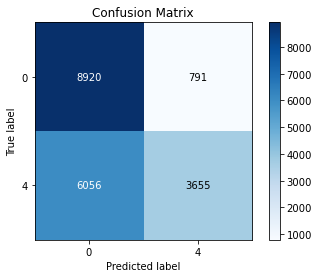

Accuracy: 0.64746 
Precision: 0.82209 
Recall: 0.37638 
F-measure: 0.51635 


In [119]:
y_u2r_rfe_prediction = logisticRegression(X_u2r_rfe, y_u2r).predict(X_u2r_test_rfe)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

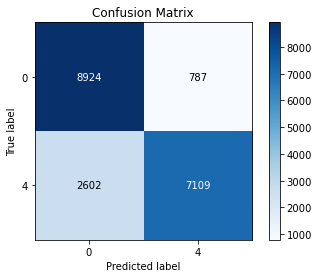

Accuracy: 0.82551 
Precision: 0.90033 
Recall: 0.73206 
F-measure: 0.80752 


In [120]:
y_u2r_rfe_prediction = logisticRegression(X_u2r_rfe_ss, y_u2r).predict(X_u2r_test_rfe_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

# Full DF, no Oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

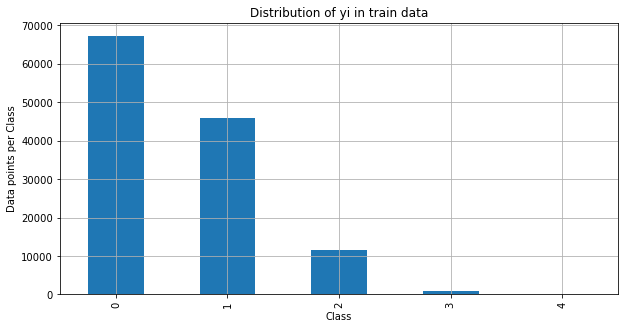

In [121]:
fullDf = getFullDf()
fullDf_test = getFullDfTest()


fullDf=oneHotEcoding(fullDf, 'protocol_type')
fullDf=oneHotEcoding(fullDf, 'service')
fullDf=oneHotEcoding(fullDf, 'flag')
fullDf_test=oneHotEcoding(fullDf_test, 'protocol_type')
fullDf_test=oneHotEcoding(fullDf_test, 'service')
fullDf_test=oneHotEcoding(fullDf_test, 'flag')

fullDf_test=adaptTestset(fullDf, fullDf_test)

fullDf['label'], fullDf_test['label'] = prepareMulticlass()

plotDf(fullDf['label'])

In [122]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(fullDf)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(fullDf_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)


In [123]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

#### K-fold cross validation on dos

In [124]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9689002677967098,
 'Mean Training Precision': 0.9844919973698143,
 'Mean Training Recall': 0.9379755635606681,
 'Mean Training F1 Score': 0.9606254619074897,
 'Mean Validation Accuracy': 0.9687472411053235,
 'Mean Validation Precision': 0.9845577519055839,
 'Mean Validation Recall': 0.9373064258161315,
 'Mean Validation F1 Score': 0.9603016761901355}

#### K-fold cross validation on dos Standard Scaling

In [125]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9980950138803056,
 'Mean Training Precision': 0.9971601448823113,
 'Mean Training Recall': 0.9981444275874468,
 'Mean Training F1 Score': 0.997652038766448,
 'Mean Validation Accuracy': 0.9979606250551779,
 'Mean Validation Precision': 0.9969118192200386,
 'Mean Validation Recall': 0.9980641672265383,
 'Mean Validation F1 Score': 0.9974870564906035}

#### Stratified cross validation on dos

In [126]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9693387481239517,
 'Mean Training Precision': 0.9844592955091385,
 'Mean Training Recall': 0.9390867759097061,
 'Mean Training F1 Score': 0.9611952492922307,
 'Mean Validation Accuracy': 0.9692592919572702,
 'Mean Validation Precision': 0.9842874464281378,
 'Mean Validation Recall': 0.9390567120015232,
 'Mean Validation F1 Score': 0.9610972426511257}

#### Stratified cross validation on dos Standard Scaling

In [127]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9980940329399763,
 'Mean Training Precision': 0.997157728408687,
 'Mean Training Recall': 0.9981443975859424,
 'Mean Training F1 Score': 0.9976508148072224,
 'Mean Validation Accuracy': 0.9979606250551779,
 'Mean Validation Precision': 0.9969125348541088,
 'Mean Validation Recall': 0.99806212168798,
 'Mean Validation F1 Score': 0.9974864831735303}

#### Predict on dos

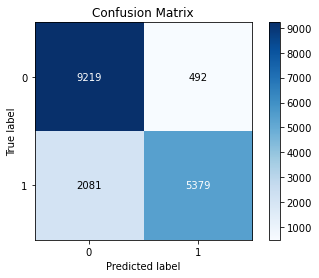

Accuracy: 0.85015 
Precision: 0.91620 
Recall: 0.72105 
F-measure: 0.80699 


In [128]:
y_dos_prediction = logisticRegression(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

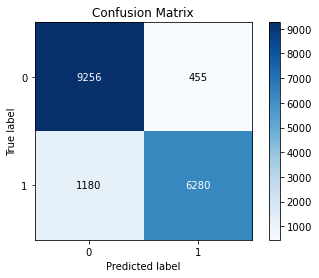

Accuracy: 0.90478 
Precision: 0.93244 
Recall: 0.84182 
F-measure: 0.88482 


In [129]:
y_dos_prediction = logisticRegression(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [130]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.8755666645480306,
 'Mean Training Precision': 0.7962772640491955,
 'Mean Training Recall': 0.19725443287054006,
 'Mean Training F1 Score': 0.3084298092417953,
 'Mean Validation Accuracy': 0.8757197001382966,
 'Mean Validation Precision': 0.8060165201773998,
 'Mean Validation Recall': 0.19826448004680636,
 'Mean Validation F1 Score': 0.30927423797125975}

#### K-fold cross validation on probe Standard Scaling

In [131]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9930800810636479,
 'Mean Training Precision': 0.9778249371064499,
 'Mean Training Recall': 0.9752150458738603,
 'Mean Training F1 Score': 0.9765181003468963,
 'Mean Validation Accuracy': 0.992734074654539,
 'Mean Validation Precision': 0.9767192857280925,
 'Mean Validation Recall': 0.9739712427591577,
 'Mean Validation F1 Score': 0.9753342538051359}

#### Stratified cross validation on probe

In [132]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.8677577975157122,
 'Mean Training Precision': 0.7459739542620704,
 'Mean Training Recall': 0.1393743023095106,
 'Mean Training F1 Score': 0.22452210950551071,
 'Mean Validation Accuracy': 0.8672263753944179,
 'Mean Validation Precision': 0.7373869844136494,
 'Mean Validation Recall': 0.13641877516766174,
 'Mean Validation F1 Score': 0.2204022106579266}

#### Stratified cross validation on probe Standard Scaling

In [133]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.993084300532276,
 'Mean Training Precision': 0.9778445383218344,
 'Mean Training Recall': 0.9752249588121245,
 'Mean Training F1 Score': 0.9765328599904658,
 'Mean Validation Accuracy': 0.992734074654539,
 'Mean Validation Precision': 0.9766999450699163,
 'Mean Validation Recall': 0.9740039311243459,
 'Mean Validation F1 Score': 0.9753412611894733}

#### Predict on probe

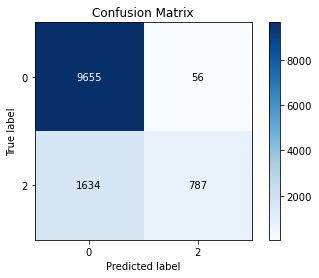

Accuracy: 0.86070 
Precision: 0.93357 
Recall: 0.32507 
F-measure: 0.48223 


In [134]:
y_probe_prediction = logisticRegression(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

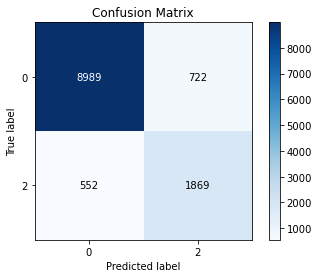

Accuracy: 0.89499 
Precision: 0.72134 
Recall: 0.77200 
F-measure: 0.74581 


In [135]:
y_probe_prediction = logisticRegression(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [136]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9855830978765718,
 'Mean Training Precision': 0.6222613919265755,
 'Mean Training Recall': 0.023686734087289864,
 'Mean Training F1 Score': 0.045408047724416825,
 'Mean Validation Accuracy': 0.9855863480096098,
 'Mean Validation Precision': 0.6459523809523808,
 'Mean Validation Recall': 0.02536186335409431,
 'Mean Validation F1 Score': 0.04763815673705317}

#### K-fold cross validation on r2l Standard Scaling

In [137]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9952442272761763,
 'Mean Training Precision': 0.848254987364804,
 'Mean Training Recall': 0.820078124054248,
 'Mean Training F1 Score': 0.8339196573606695,
 'Mean Validation Accuracy': 0.9949222731308636,
 'Mean Validation Precision': 0.8328016931630078,
 'Mean Validation Recall': 0.8141336805338044,
 'Mean Validation F1 Score': 0.8227072833437308}

#### Stratified cross validation on r2l

In [138]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.985168491198824,
 'Mean Training Precision': 0.568905037096316,
 'Mean Training Recall': 0.026914280726256984,
 'Mean Training F1 Score': 0.048312411136315694,
 'Mean Validation Accuracy': 0.9853522245094636,
 'Mean Validation Precision': 0.7080630630630631,
 'Mean Validation Recall': 0.031151515151515152,
 'Mean Validation F1 Score': 0.05460203427863811}

#### Stratified cross validation on r2l Standard Scaling

In [139]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9952409754551568,
 'Mean Training Precision': 0.8484511912987177,
 'Mean Training Recall': 0.8195417248603352,
 'Mean Training F1 Score': 0.8337385024448736,
 'Mean Validation Accuracy': 0.9949076404121042,
 'Mean Validation Precision': 0.8338432919121445,
 'Mean Validation Recall': 0.8141414141414142,
 'Mean Validation F1 Score': 0.8229873912540635}

#### Predict on r2l

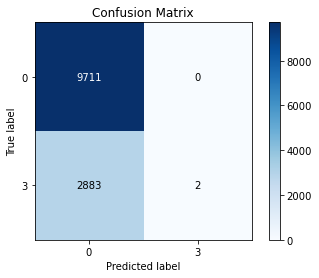

Accuracy: 0.77112 
Precision: 1.00000 
Recall: 0.00069 
F-measure: 0.00139 


In [140]:
y_r2l_prediction = logisticRegression(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

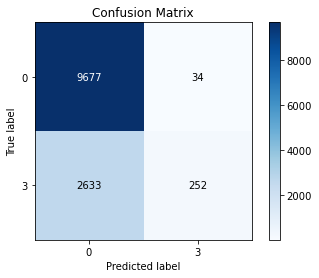

Accuracy: 0.78827 
Precision: 0.88112 
Recall: 0.08735 
F-measure: 0.15894 


In [141]:
y_r2l_prediction = logisticRegression(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [142]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_divisi

>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9994130781014284,
 'Mean Training Precision': 0.5877214170692432,
 'Mean Training Recall': 0.3029481687974155,
 'Mean Training F1 Score': 0.39965672363797367,
 'Mean Validation Accuracy': 0.999317463385766,
 'Mean Validation Precision': 0.39166666666666666,
 'Mean Validation Recall': 0.22666666666666666,
 'Mean Validation F1 Score': 0.2852380952380952}

#### K-fold cross validation on u2r Standard Scaling

In [143]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9996372959030453,
 'Mean Training Precision': 0.9115795144222563,
 'Mean Training Recall': 0.587801373387636,
 'Mean Training F1 Score': 0.7143689530129621,
 'Mean Validation Accuracy': 0.9994955137353191,
 'Mean Validation Precision': 0.8041666666666668,
 'Mean Validation Recall': 0.5241666666666667,
 'Mean Validation F1 Score': 0.6201190476190476}

#### Stratified cross validation on u2r

In [144]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Mean Training Accuracy': 0.9993899976094086,
 'Mean Training Precision': 0.5050445930880714,
 'Mean Training Recall': 0.26054579093432007,
 'Mean Training F1 Score': 0.3436049631120054,
 'Mean Validation Accuracy': 0.9992581073982306,
 'Mean Validation Precision': 0.3,
 'Mean Validation Recall': 0.14,
 'Mean Validation F1 Score': 0.1892857142857143}

#### Stratified cross validation on u2r Standard Scaling

In [145]:
stratifiedCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9996339986200065,
 'Mean Training Precision': 0.8994534722322542,
 'Mean Training Recall': 0.5919056429232192,
 'Mean Training F1 Score': 0.7135747471523621,
 'Mean Validation Accuracy': 0.9994955159369505,
 'Mean Validation Precision': 0.7833333333333334,
 'Mean Validation Recall': 0.52,
 'Mean Validation F1 Score': 0.5908008658008658}

#### Predict on u2r

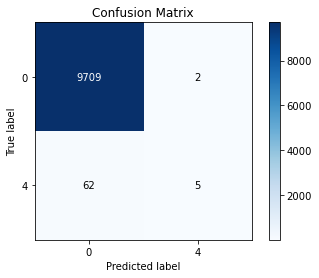

Accuracy: 0.99345 
Precision: 0.71429 
Recall: 0.07463 
F-measure: 0.13514 


In [146]:
y_u2r_prediction = logisticRegression(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

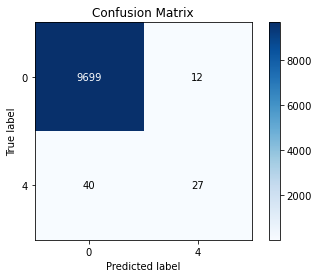

Accuracy: 0.99468 
Precision: 0.69231 
Recall: 0.40299 
F-measure: 0.50943 


In [147]:
y_u2r_prediction = logisticRegression(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

## Binary dataset no feature selection

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

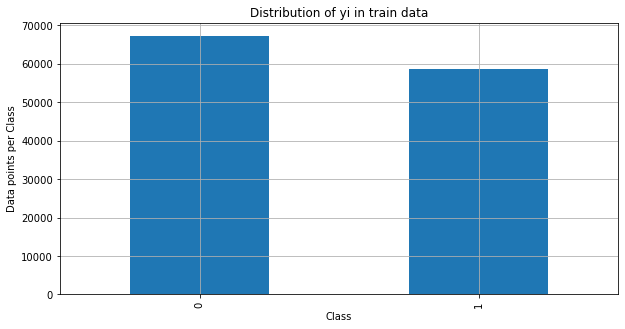

In [148]:
fullDf = getFullDf()
fullDf_test = getFullDfTest()

fullDf['label'], fullDf_test['label'] = prepareBinary()

fullDf=oneHotEcoding(fullDf, 'protocol_type')
fullDf=oneHotEcoding(fullDf, 'service')
fullDf=oneHotEcoding(fullDf, 'flag')
fullDf_test=oneHotEcoding(fullDf_test, 'protocol_type')
fullDf_test=oneHotEcoding(fullDf_test, 'service')
fullDf_test=oneHotEcoding(fullDf_test, 'flag')

fullDf_test=adaptTestset(fullDf, fullDf_test)

colNames=list(fullDf)
colNames_test=list(fullDf_test)

plotDf(fullDf['label'])


In [149]:
x_df, y_df = getXandY(fullDf)
x_df_test, y_df_test = getXandY(fullDf_test)

x_df_ss = standardScaler(x_df)
x_df_test_ss = standardScaler(x_df_test)


In [150]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(x_df), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.8783407731396382,
 'Mean Training Precision': 0.8776694958552941,
 'Mean Training Recall': 0.858774885908592,
 'Mean Training F1 Score': 0.8679468115650616,
 'Mean Validation Accuracy': 0.8784501706352292,
 'Mean Validation Precision': 0.8777189108541006,
 'Mean Validation Recall': 0.859043061013993,
 'Mean Validation F1 Score': 0.8680716785987939}

In [151]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(x_df_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9738409552463188,
 'Mean Training Precision': 0.9783462025008344,
 'Mean Training Recall': 0.9651559814661491,
 'Mean Training F1 Score': 0.9717063148357145,
 'Mean Validation Accuracy': 0.9735340255883592,
 'Mean Validation Precision': 0.9779179000123881,
 'Mean Validation Recall': 0.9649154537047974,
 'Mean Validation F1 Score': 0.9713710425562947}

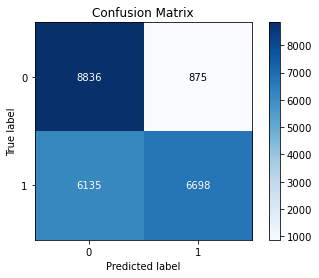

Accuracy: 0.68905 
Precision: 0.88446 
Recall: 0.52194 
F-measure: 0.65647 


In [152]:
y_prediction = logisticRegression(x_df, y_df).predict(x_df_test)
plotConfusionMatrix(y_prediction, y_df_test, 1)

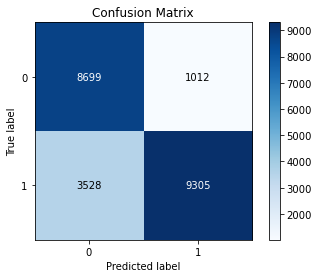

Accuracy: 0.79862 
Precision: 0.90191 
Recall: 0.72508 
F-measure: 0.80389 


In [153]:
y_prediction = logisticRegression(x_df_ss, y_df).predict(x_df_test_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

## Binary dataset feature selection

In [154]:
X_df_rfe, rfecolname = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), pd.DataFrame(x_df), y_df, 13)
X_df_test_rfe=x_df_test.values[:,rfecolname]

In [155]:
X_df_rfe_ss, rfecolname_ss = recursiveFeatureExtraction(LogisticRegression(max_iter=10000), pd.DataFrame(x_df_ss), y_df, 13)
X_df_test_rfe_ss=x_df_test_ss[:,rfecolname_ss]

#### K-fold cross validation

In [156]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_df_rfe), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9510926950310582,
 'Mean Training Precision': 0.9532826607765955,
 'Mean Training Recall': 0.9410353697186322,
 'Mean Training F1 Score': 0.9471192286448245,
 'Mean Validation Accuracy': 0.9510609633051301,
 'Mean Validation Precision': 0.9532125137221857,
 'Mean Validation Recall': 0.9410585591610519,
 'Mean Validation F1 Score': 0.9470918620222191}

#### K-fold cross validation Standard Scaler

In [157]:
KfoldCV(LogisticRegression(max_iter=10000), pd.DataFrame(X_df_rfe_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9601960564739205,
 'Mean Training Precision': 0.9542992299929223,
 'Mean Training Recall': 0.9604734846911702,
 'Mean Training F1 Score': 0.9573763395093424,
 'Mean Validation Accuracy': 0.9601422568740835,
 'Mean Validation Precision': 0.9542669234907226,
 'Mean Validation Recall': 0.9604129326809406,
 'Mean Validation F1 Score': 0.9573251653497534}

#### Predict

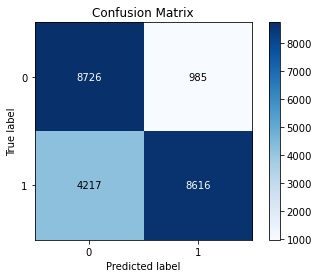

Accuracy: 0.76925 
Precision: 0.89741 
Recall: 0.67139 
F-measure: 0.76812 


In [158]:
y_prediction = logisticRegression(X_df_rfe, y_df).predict(X_df_test_rfe)
plotConfusionMatrix(y_prediction, y_df_test, 1)

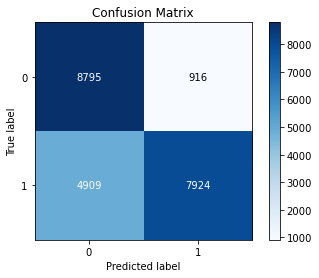

Accuracy: 0.74162 
Precision: 0.89638 
Recall: 0.61747 
F-measure: 0.73123 


In [159]:
y_prediction = logisticRegression(X_df_rfe_ss, y_df).predict(X_df_test_rfe_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)